# Air Quality Visualization

### Plot daily average


## 1.Clean the data

In [1]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [2]:
airq<-read.csv("nan_daily.csv")

In [3]:
sensorlist<-read.csv("sensorlist.csv")

In [4]:
airq$avgtemp <- airq$avgtemp-5
airq$avghumid <- airq$avghumid+6
airq$avgpm25 <- airq$avgpm25/0.8
airq$avgpm10 <- airq$avgpm10/0.5

In [5]:
airq<-sqldf("select a.*,s.tambol,s.amphoe from airq a, sensorlist s where a.id=s.sensorid")

Loading required package: tcltk
Warning message:
“Quoted identifiers should have class SQL, use DBI::SQL() if the caller performs the quoting.”

In [6]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe
CU-S0001,2016,12,13,348,24.76084,58.75686,9.076708,23.371163,62.019505,บ่อเกลือเหนือ,บ่อเกลือ
CU-S0001,2016,12,14,349,20.02680,52.91064,5.232055,8.226904,14.356337,บ่อเกลือเหนือ,บ่อเกลือ
CU-S0001,2016,12,15,350,16.84827,73.65511,9.688295,15.578468,27.635284,บ่อเกลือเหนือ,บ่อเกลือ
CU-S0001,2016,12,16,351,15.24135,84.71629,7.682900,12.209841,21.275810,บ่อเกลือเหนือ,บ่อเกลือ
CU-S0001,2016,12,17,352,13.20701,86.02571,1.031734,1.653137,2.924477,บ่อเกลือเหนือ,บ่อเกลือ
CU-S0001,2016,12,18,353,15.75683,81.59185,12.043110,20.428888,36.096063,บ่อเกลือเหนือ,บ่อเกลือ


Create text month

In [7]:
airq$monthf<-factor(airq$m,levels=as.character(1:12),labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"),ordered=TRUE)

Create date format column from y m d

In [8]:
airq$date<-as.Date(paste(airq$y,"-",airq$m,"-",airq$d,sep=""))

Find week of year for each day

In [9]:
airq$woy<-as.numeric(format(airq$date,"%W"))

Then for each monthblock we normalize the week to start at 1

In [10]:
library(plyr)

In [11]:
airq<-ddply(airq,.(m),transform,monthweek=1+woy-min(woy))

In [12]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,monthf,date,woy,monthweek
CU-S0001,2017,1,1,1,14.89251,79.87243,16.172147,27.470355,49.572335,บ่อเกลือเหนือ,บ่อเกลือ,Jan,2017-01-01,0,1
CU-S0002,2017,1,1,1,21.88037,66.75332,20.988841,36.992608,67.473588,บ่อแก้ว,นาหมื่น,Jan,2017-01-01,0,1
CU-S0002,2017,1,2,2,24.10015,62.65051,12.574908,20.763292,35.503871,บ่อแก้ว,นาหมื่น,Jan,2017-01-02,1,2
CU-S0002,2017,1,3,3,25.03516,60.81269,8.854387,14.275515,24.710861,บ่อแก้ว,นาหมื่น,Jan,2017-01-03,1,2
CU-S0002,2017,1,4,4,23.41016,62.78717,9.699804,15.929829,28.467878,บ่อแก้ว,นาหมื่น,Jan,2017-01-04,1,2
CU-S0002,2017,1,5,5,19.19143,76.63869,3.251032,5.101669,8.619844,บ่อแก้ว,นาหมื่น,Jan,2017-01-05,1,2


Create day of week (dow) column

In [13]:
airq$dow<-as.POSIXlt(airq$date)$wday

In [14]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,monthf,date,woy,monthweek,dow
CU-S0001,2017,1,1,1,14.89251,79.87243,16.172147,27.470355,49.572335,บ่อเกลือเหนือ,บ่อเกลือ,Jan,2017-01-01,0,1,0
CU-S0002,2017,1,1,1,21.88037,66.75332,20.988841,36.992608,67.473588,บ่อแก้ว,นาหมื่น,Jan,2017-01-01,0,1,0
CU-S0002,2017,1,2,2,24.10015,62.65051,12.574908,20.763292,35.503871,บ่อแก้ว,นาหมื่น,Jan,2017-01-02,1,2,1
CU-S0002,2017,1,3,3,25.03516,60.81269,8.854387,14.275515,24.710861,บ่อแก้ว,นาหมื่น,Jan,2017-01-03,1,2,2
CU-S0002,2017,1,4,4,23.41016,62.78717,9.699804,15.929829,28.467878,บ่อแก้ว,นาหมื่น,Jan,2017-01-04,1,2,3
CU-S0002,2017,1,5,5,19.19143,76.63869,3.251032,5.101669,8.619844,บ่อแก้ว,นาหมื่น,Jan,2017-01-05,1,2,4


In [15]:
library(ggplot2)

Check dow

In [16]:
min(airq$dow)
max(airq$dow)

[1] 0

[1] 6

Create day of week text (dowf) column. We will use it in the plot. 

In [17]:
airq$dowf<-factor(airq$dow,levels=rev(0:6),labels=rev(c("Sun","Mon","Tue","Wed","Thu","Fri","Sat")),ordered=TRUE)

In [18]:
airq

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,monthf,date,woy,monthweek,dow,dowf
CU-S0001,2017,1,1,1,14.89251,79.87243,16.172147,27.470355,49.572335,บ่อเกลือเหนือ,บ่อเกลือ,Jan,2017-01-01,0,1,0,Sun
CU-S0002,2017,1,1,1,21.88037,66.75332,20.988841,36.992608,67.473588,บ่อแก้ว,นาหมื่น,Jan,2017-01-01,0,1,0,Sun
CU-S0002,2017,1,2,2,24.10015,62.65051,12.574908,20.763292,35.503871,บ่อแก้ว,นาหมื่น,Jan,2017-01-02,1,2,1,Mon
CU-S0002,2017,1,3,3,25.03516,60.81269,8.854387,14.275515,24.710861,บ่อแก้ว,นาหมื่น,Jan,2017-01-03,1,2,2,Tue
CU-S0002,2017,1,4,4,23.41016,62.78717,9.699804,15.929829,28.467878,บ่อแก้ว,นาหมื่น,Jan,2017-01-04,1,2,3,Wed
CU-S0002,2017,1,5,5,19.19143,76.63869,3.251032,5.101669,8.619844,บ่อแก้ว,นาหมื่น,Jan,2017-01-05,1,2,4,Thu
CU-S0002,2017,1,6,6,21.09183,71.49509,6.349598,10.346195,17.730654,บ่อแก้ว,นาหมื่น,Jan,2017-01-06,1,2,5,Fri
CU-S0002,2017,1,7,7,23.66040,63.39135,10.990195,17.843408,30.923965,บ่อแก้ว,นาหมื่น,Jan,2017-01-07,1,2,6,Sat
CU-S0002,2017,1,8,8,23.38347,66.33440,11.222416,17.896559,30.675040,บ่อแก้ว,นาหมื่น,Jan,2017-01-08,1,2,0,Sun
CU-S0002,2017,1,9,9,23.07823,71.36910,14.225962,23.640419,40.923352,บ่อแก้ว,นาหมื่น,Jan,2017-01-09,2,3,1,Mon


In [19]:
max(airq$monthweek)
min(airq$monthweek)

[1] 6

[1] 1

Check the result

In [20]:
sqldf('select * from airq where m=1 and id="CU-S0003"')

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,monthf,date,woy,monthweek,dow,dowf
CU-S0003,2017,1,1,1,21.22564,66.78534,24.480435,42.315707,78.22467,เจดีย์ชัย,ปัว,Jan,2017-01-01,0,1,0,Sun
CU-S0003,2017,1,2,2,23.98399,66.02772,13.509759,21.237634,36.21214,เจดีย์ชัย,ปัว,Jan,2017-01-02,1,2,1,Mon
CU-S0003,2017,1,3,3,24.57416,64.02827,12.765383,20.079004,34.70528,เจดีย์ชัย,ปัว,Jan,2017-01-03,1,2,2,Tue
CU-S0003,2017,1,4,4,21.90557,65.84468,12.839933,21.211851,38.37267,เจดีย์ชัย,ปัว,Jan,2017-01-04,1,2,3,Wed
CU-S0003,2017,1,5,5,20.17165,72.08777,4.721033,7.021876,11.94728,เจดีย์ชัย,ปัว,Jan,2017-01-05,1,2,4,Thu
CU-S0003,2017,1,6,6,20.76541,72.17984,6.090636,9.335108,15.91699,เจดีย์ชัย,ปัว,Jan,2017-01-06,1,2,5,Fri
CU-S0003,2017,1,7,7,22.99230,68.01024,7.578818,11.745253,20.14260,เจดีย์ชัย,ปัว,Jan,2017-01-07,1,2,6,Sat
CU-S0003,2017,1,8,8,23.72287,60.82860,15.964473,26.338048,47.91771,เจดีย์ชัย,ปัว,Jan,2017-01-08,1,2,0,Sun
CU-S0003,2017,1,9,9,23.18391,65.78172,15.814282,25.441337,46.52040,เจดีย์ชัย,ปัว,Jan,2017-01-09,2,3,1,Mon
CU-S0003,2017,1,10,10,22.85655,71.87230,20.746444,33.500446,59.11664,เจดีย์ชัย,ปัว,Jan,2017-01-10,2,3,2,Tue


## 2. Use ggplot to create heatmap

Check min and max of temperature

In [21]:
min(airq$avgtemp)
max(airq$avgtemp)

[1] 3.633333

[1] 337991751

Convert temp into categorical data by cutting it into chunks.

In [22]:
maxtemp<-max(airq$avgtemp)
airq$tempcat<-cut(airq$avgtemp,c(0,10,20,30,40,max(airq$avgtemp)))

In [23]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,monthf,date,woy,monthweek,dow,dowf,tempcat
CU-S0001,2017,1,1,1,14.89251,79.87243,16.172147,27.470355,49.572335,บ่อเกลือเหนือ,บ่อเกลือ,Jan,2017-01-01,0,1,0,Sun,"(10,20]"
CU-S0002,2017,1,1,1,21.88037,66.75332,20.988841,36.992608,67.473588,บ่อแก้ว,นาหมื่น,Jan,2017-01-01,0,1,0,Sun,"(20,30]"
CU-S0002,2017,1,2,2,24.10015,62.65051,12.574908,20.763292,35.503871,บ่อแก้ว,นาหมื่น,Jan,2017-01-02,1,2,1,Mon,"(20,30]"
CU-S0002,2017,1,3,3,25.03516,60.81269,8.854387,14.275515,24.710861,บ่อแก้ว,นาหมื่น,Jan,2017-01-03,1,2,2,Tue,"(20,30]"
CU-S0002,2017,1,4,4,23.41016,62.78717,9.699804,15.929829,28.467878,บ่อแก้ว,นาหมื่น,Jan,2017-01-04,1,2,3,Wed,"(20,30]"
CU-S0002,2017,1,5,5,19.19143,76.63869,3.251032,5.101669,8.619844,บ่อแก้ว,นาหมื่น,Jan,2017-01-05,1,2,4,Thu,"(10,20]"


Try plotting

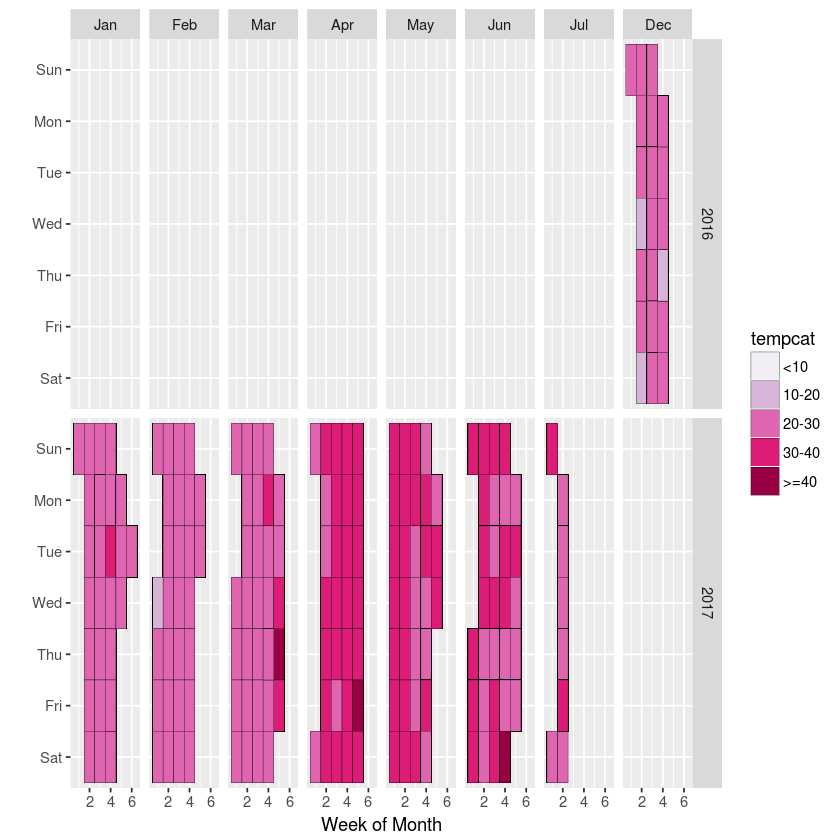

In [24]:
ggplot(airq, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "black") + scale_fill_brewer(palette = "PuRd",labels = c("<10", "10-20", "20-30","30-40",">=40"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

There are temp more than 50 which are impossible. If the data is more than 50, mark it as invalid.

In [25]:
maxtemp<-max(airq$avgtemp)
airq$tempcat<-cut(airq$avgtemp,c(0,10,20,30,40,50,max(airq$avgtemp)))

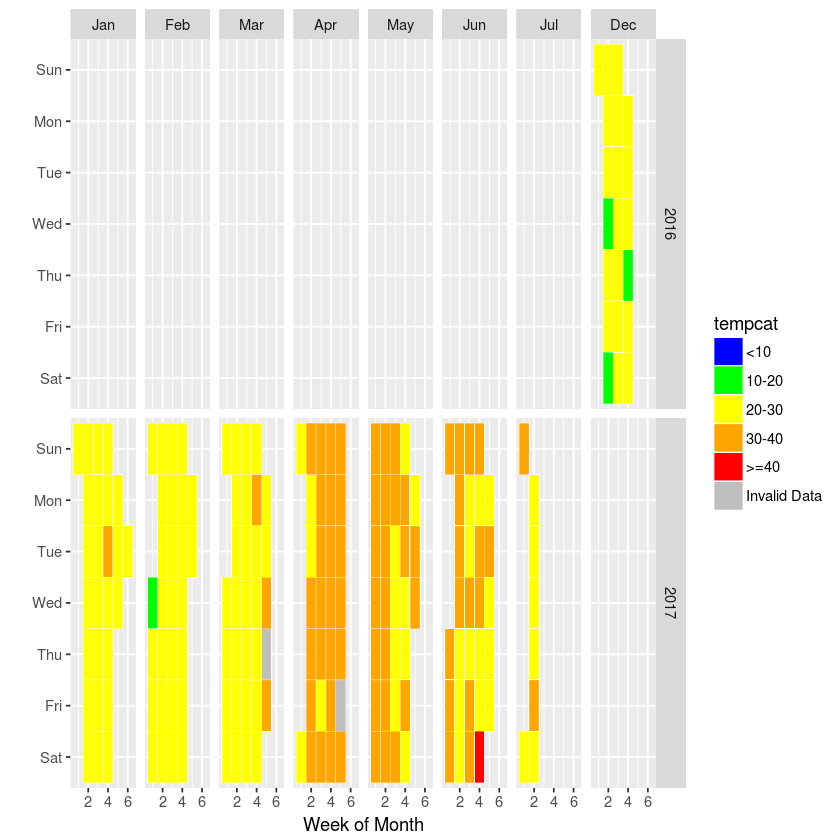

In [26]:
ggplot(airq, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "white") + scale_fill_manual(values=c("blue","green","yellow","orange","red","grey"),labels = c("<10", "10-20", "20-30","30-40",">=40","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Something wrong with the color--very high value was assigned to 30-40 degree. Try to average the data manually.

In [27]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgtemp) from airq group by y,doy')

In [28]:
head(airqdaily)

date,y,monthf,monthweek,dowf,avg(avgtemp)
2016-12-11,2016,Dec,1,Sun,26.27250
2016-12-12,2016,Dec,2,Mon,25.55400
2016-12-13,2016,Dec,2,Tue,26.56401
2016-12-14,2016,Dec,2,Wed,29.93037
2016-12-15,2016,Dec,2,Thu,20.83115
2016-12-16,2016,Dec,2,Fri,20.67758


In [29]:
colnames(airqdaily)[6]<-"avgtemp"
maxtemp<-max(airqdaily$avgtemp)
airqdaily$tempcat<-cut(airqdaily$avgtemp,c(0,10,20,30,40,50,max(airqdaily$avgtemp)))

Please check the number of classes before assign the color. If the number of color is more than the number of class, false assigning occurred

In [30]:
sqldf('select distinct(tempcat) from airqdaily')

tempcat
"(20,30]"
"(10,20]"
"(30,40]"
"(50,7.56e+06]"


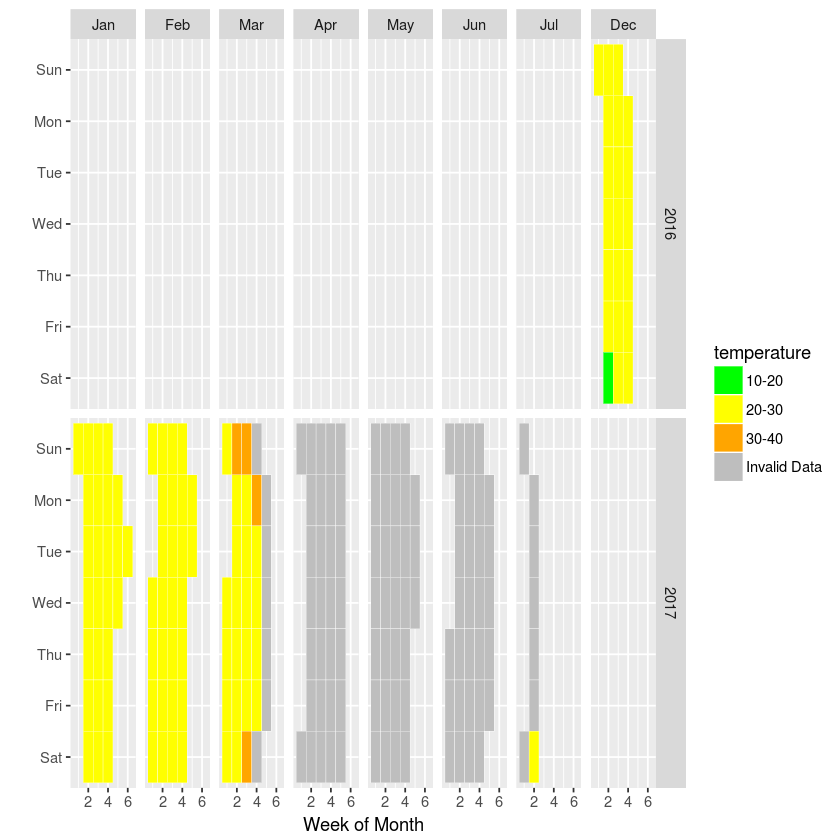

In [31]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "white") + scale_fill_manual(guide = guide_legend(title = "temperature"),values=c("green","yellow","orange","grey"),labels = c("10-20","20-30","30-40","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Now,visualize humidity

In [32]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avghumid) from airq group by y,doy')
colnames(airqdaily)[6]<-"avghumid"
maxhumid<-max(airqdaily$avghumid)
airqdaily$humidity<-cut(airqdaily$avghumid,c(0,20,30,50,80,maxhumid))

In [33]:
sqldf('select distinct(humidity) from airqdaily')

humidity
"(50,80]"
"(80,8.06e+06]"
"(30,50]"


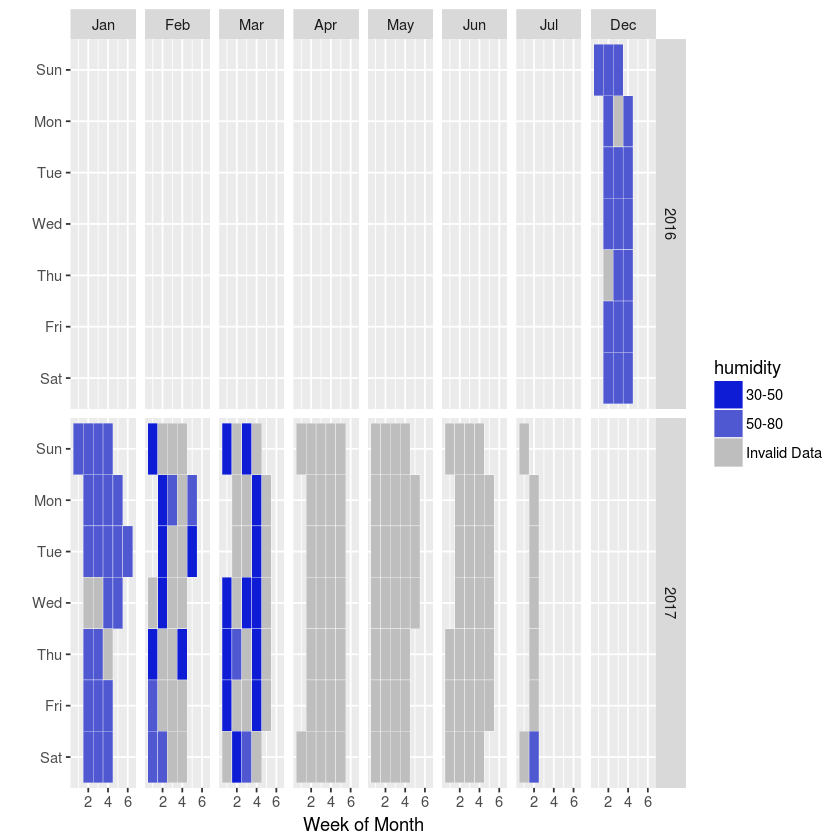

In [34]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = humidity),colour = "white") + scale_fill_manual(values=c("#0e1cd6","#4f58d1","grey"),labels = c("30-50","50-80","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Visualze pm1

In [35]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm1) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm1"
maxpm1<-max(airqdaily$avgpm1)
airqdaily$pm1<-cut(airqdaily$avgpm1,c(0,50,120,200,300,maxpm1))

In [36]:
sqldf('select distinct(pm1) from airqdaily')

pm1
"(0,50]"
"(50,79.8]"


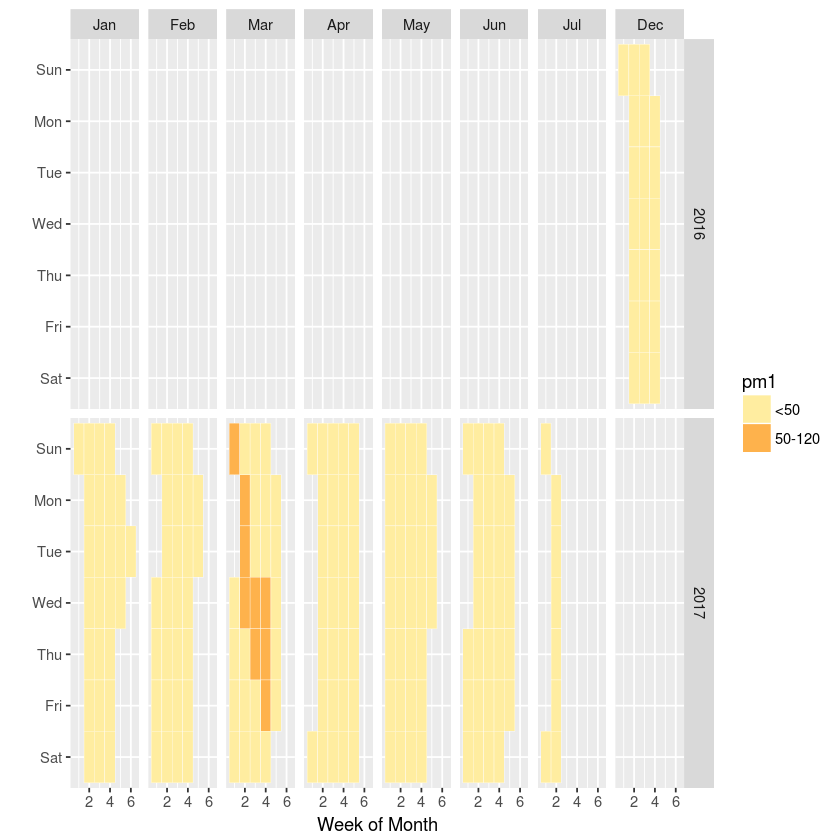

In [37]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm1),colour = "white") + scale_fill_manual(values=c("#ffeda0","#feb24c"),labels = c("<50","50-120"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

visualize pm2.5

In [38]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm25) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm25"
maxpm25<-max(airqdaily$avgpm25)
airqdaily$pm25<-cut(airqdaily$avgpm25,c(0,50,120,200,300,maxpm25))

In [39]:
sqldf('select distinct(pm25) from airqdaily')

pm25
"(0,50]"
"(120,155]"
"(50,120]"


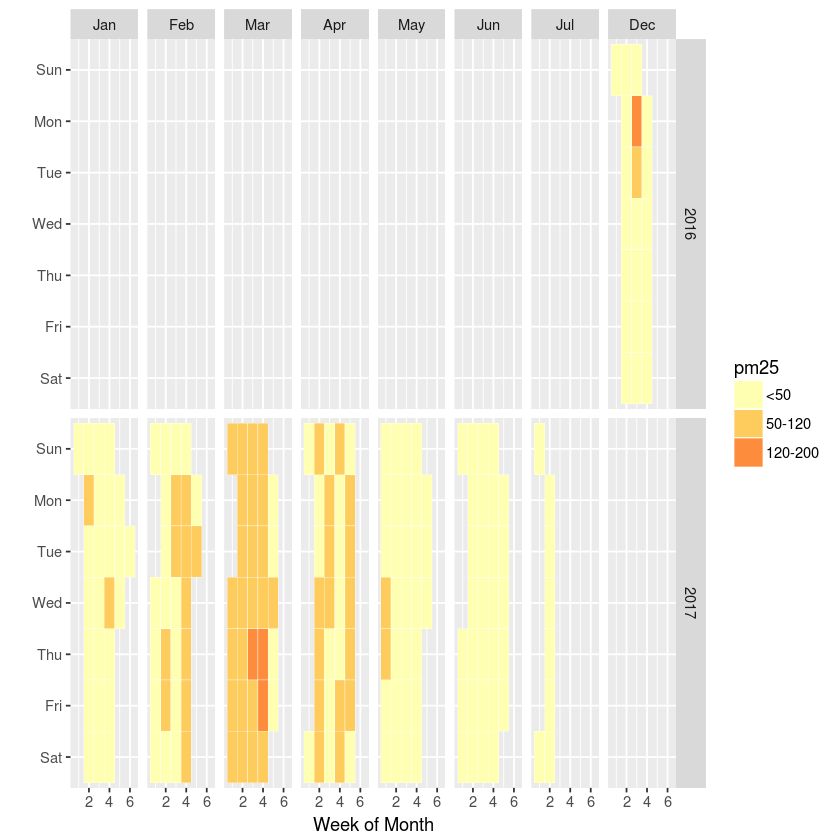

In [40]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm25),colour = "white") + scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c"),labels = c("<50","50-120","120-200"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

visualize pm10

In [41]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm10) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm10"
maxpm10<-max(airqdaily$avgpm10)
airqdaily$pm10<-cut(airqdaily$avgpm10,c(0,50,120,200,300,maxpm10))

In [42]:
sqldf('select distinct(pm10) from airqdaily')

pm10
"(0,50]"
"(300,490]"
"(50,120]"
"(120,200]"
"(200,300]"


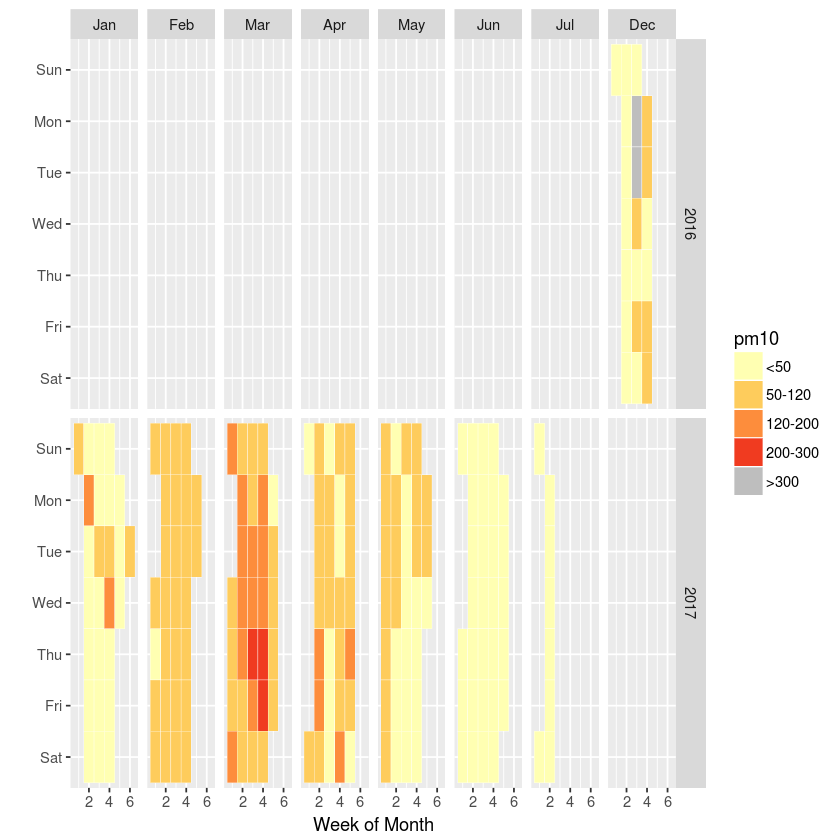

In [43]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm10),colour = "white") + scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","grey"),labels = c("<50","50-120","120-200","200-300",">300"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

In [44]:
airq$pm1cat<-cut(airq$avgpm1,c(0,50,120,200,300),include.lowest=TRUE)
sqldf('select distinct(pm1cat) from airq')

pm1cat
"[0,50]"
"(200,300]"
"(120,200]"
"(50,120]"


In [45]:
airq$pm25cat<-cut(airq$avgpm25, breaks=c(0, 50, 120, 200, 300, max(airq$avgpm25)), include.lowest=TRUE)
sqldf('select distinct(pm25cat) from airq')

pm25cat
"[0,50]"
"(50,120]"
"(300,1.45e+03]"
"(120,200]"
"(200,300]"


In [46]:
airq[is.na(airq$pm25cat),]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,⋯,amphoe,monthf,date,woy,monthweek,dow,dowf,tempcat,pm1cat,pm25cat


In [47]:
airq$pm10cat<-cut(airq$avgpm10, breaks=c(0, 50, 120, 200, 300, max(airq$avgpm10)), include.lowest=TRUE)
sqldf('select distinct(pm10cat) from airq')

pm10cat
"[0,50]"
"(50,120]"
"(300,6.22e+03]"
"(120,200]"
"(200,300]"


In [48]:
airq$my<-paste(airq$m,airq$y,sep='-')

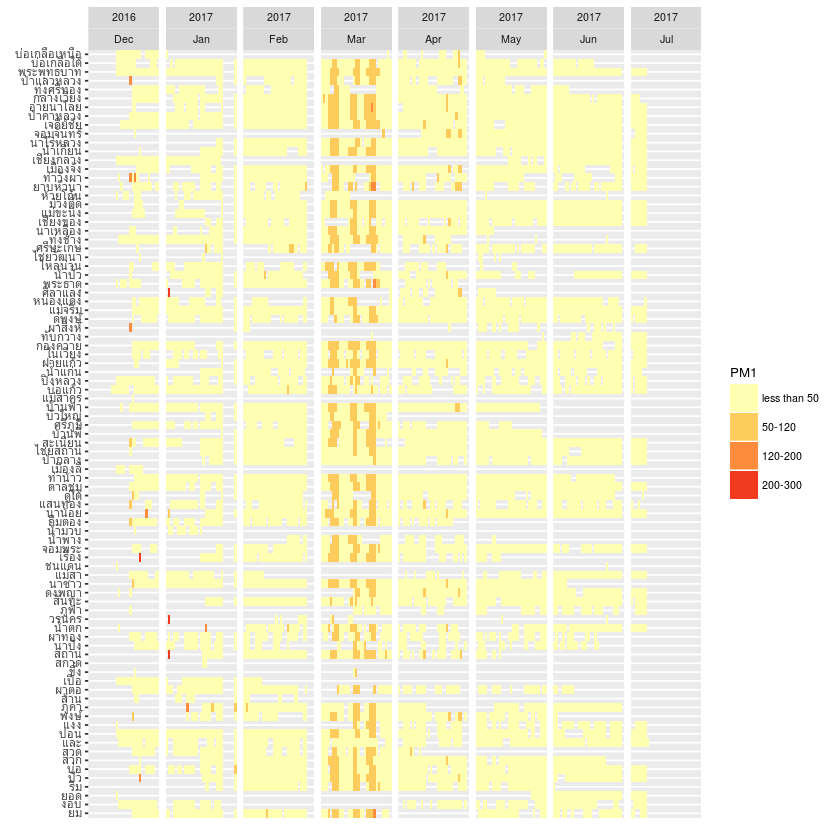

In [49]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "PM1"),values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
base_size<-8
p+theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

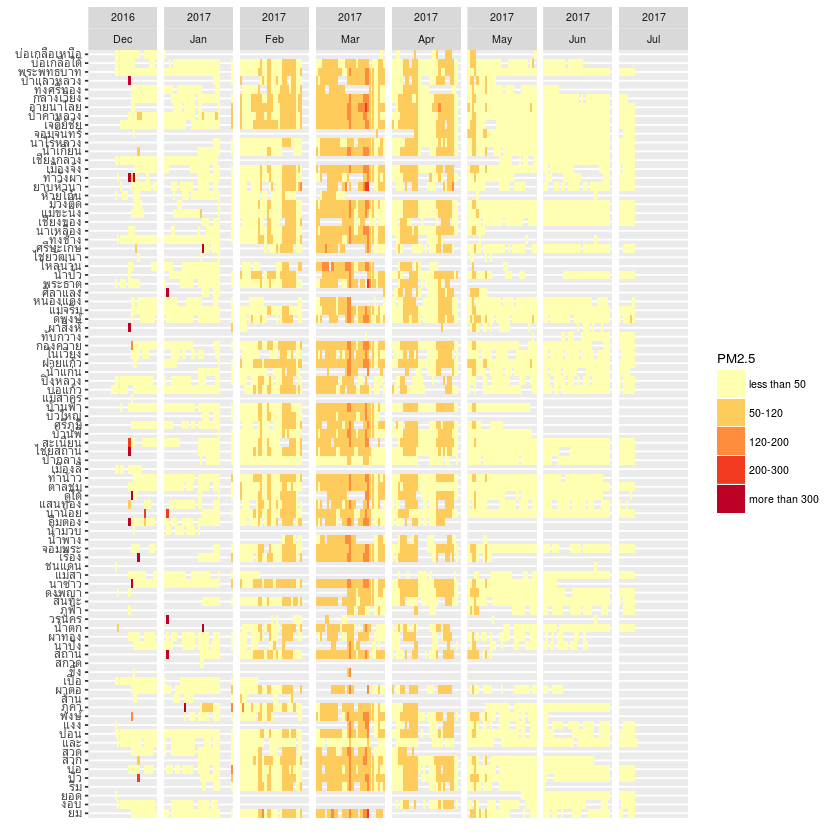

In [50]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "PM2.5"),values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

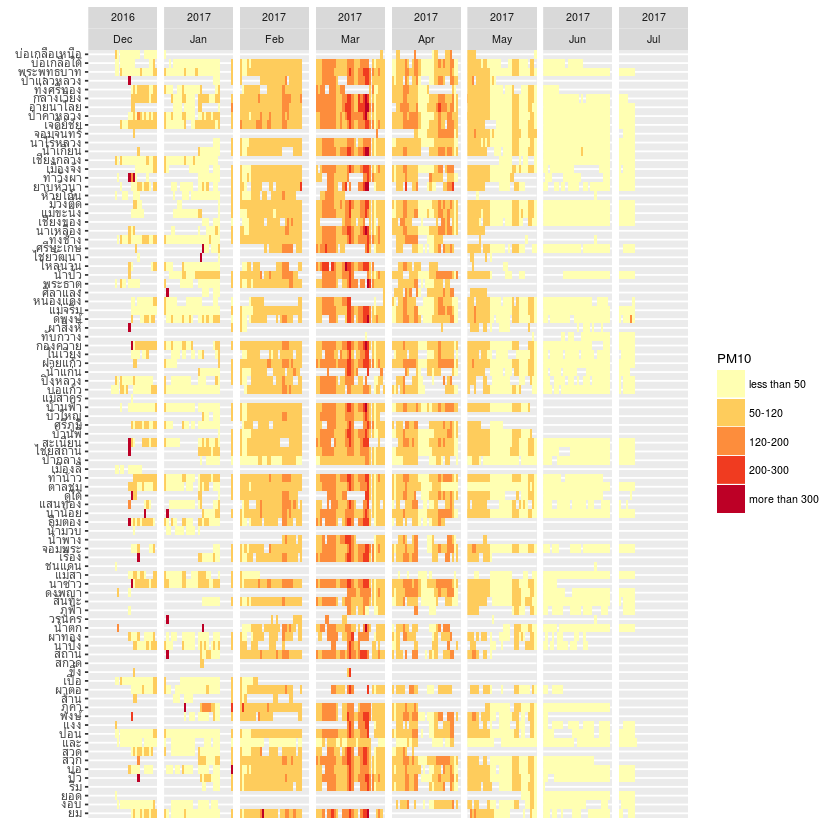

In [51]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "PM10"),values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

In [52]:
sqldf('select distinct(tempcat) from airq')

tempcat
"(10,20]"
"(20,30]"
"(30,40]"
"(40,50]"
"(50,3.38e+08]"
"(0,10]"


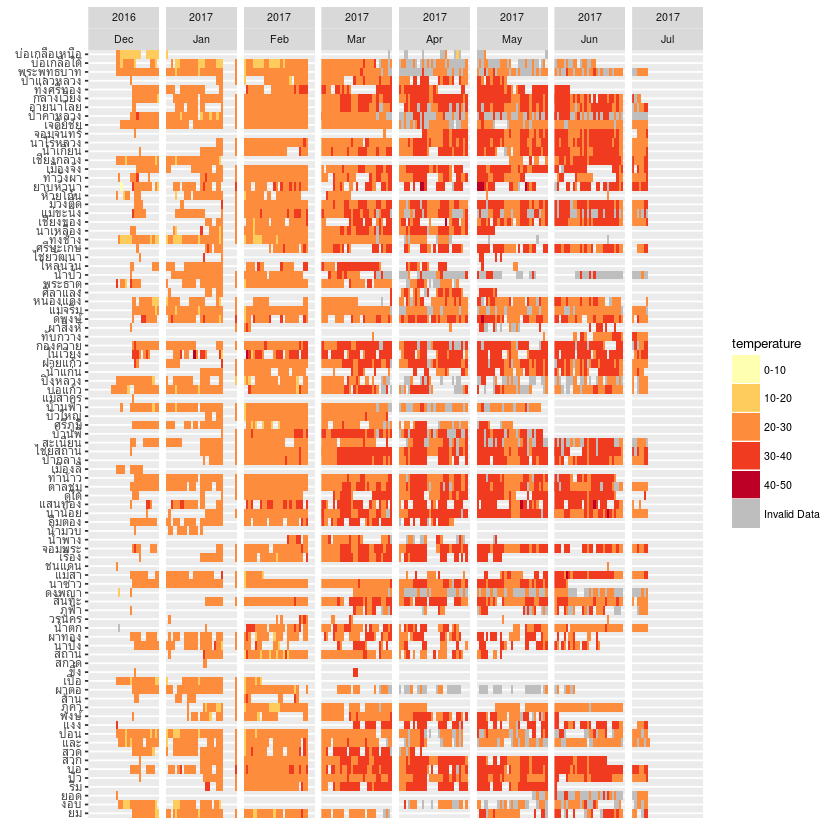

In [53]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = tempcat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "temperature"),values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026","grey"),labels = c("0-10","10-20","20-30","30-40","40-50","Invalid Data"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

In [54]:
airq$humidcat<-cut(airq$avghumid, breaks=c(0, 20, 30, 50, 80, max(airq$avghumid)), include.lowest=TRUE)
sqldf('select distinct(humidcat) from airq')

humidcat
"(50,80]"
"(30,50]"
"(80,3.18e+08]"
"[0,20]"
"(20,30]"


In [55]:
levels(airq$tambol)

[1] "ยม"         "งอบ"        "ยอด"        "ริม"         "ปัว"        
 [6] "บ่อ"         "สวก"        "สวด"        "และ"        "ปอน"       
[11] "แงง"        "พงษ์"        "ภูคา"        "ส้าน"        "ผาตอ"      
[16] "เปือ"        "ขึ่ง"         "สกาด"       "สถาน"       "นาปัง"      
[21] "ผาทอง"      "น้ำตก"       "วรนคร"      "ภูฟ้า"        "สันทะ"      
[26] "ดงพญา"      "นาซาว"      "แม่สา"       "ชนแดน"      "เรือง"      
[31] "จอมพระ"     "น้ำพาง"      "น้ำมวบ"      "ถืมตอง"      "นาน้อย"     
[36] "แสนทอง"     "ดู่ใต้"        "ตาลชุม"      "ท่าน้าว"      "เมืองลี"     
[41] "ป่ากลาง"     "ขุนน่าน"      "ไชยสถาน"    "สะเนียน"     "บ้านพี้"      
[46] "ศรีภูมิ"       "บัวใหญ่"      "บ้านฟ้า"      "แม่สาคร"     "บ่อแก้ว"     
[51] "ปิงหลวง"     "น้ำแก่น"      "ฝายแก้ว"     "ในเวียง"     "กองควาย"   
[56] "ทับกวาง"     "ผาสิงห์"      "ดุ่พงษ์"       "แม่จริม"      "หนองแดง"   
[61] "ศิลาแลง"     "พระธาตุ"     "น้ำปั้ว"       "ไหลน่าน"     "ไชยวัฒนา"   
[66] "ศรีษะเกษ"    "ทุ่งช้าง"      "นาเหลือง"    "เชียงของ"    "แม่ขะนิง"    
[71] "ม่วงตึ๊ด"      "ห้วยโก๋น"     "ยาบหัวนา"    "ท่าวังผา"     "เมืองจัง"    
[76] "เชียงกลาง"   "น้ำเกี้ยน"     "นาไร่หลวง"   "จอมจันทร์"    "เจดีย์ชัย"    
[81] "ป่าคาหลวง"   "อ่ายนาไลย"   "กลางเวียง"   "ทุ่งศรีทอง"    "ป่าแลวหลวง" 
[86] "พระพุทธบาท"  "บ่อเกลือใต้"   "บ่อเกลือเหนือ"

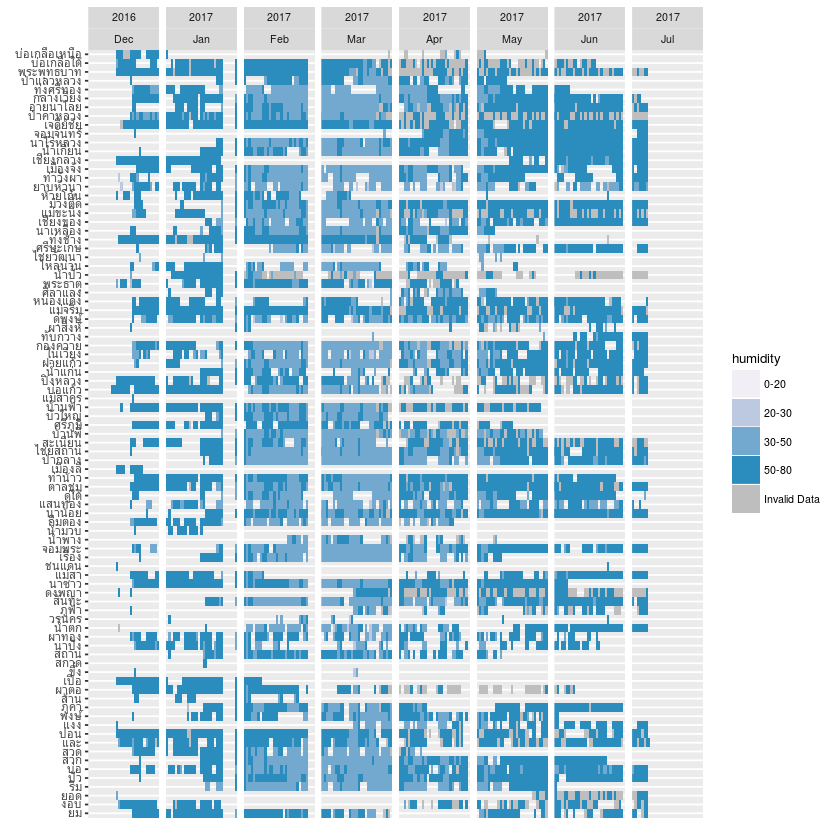

In [56]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = humidcat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "humidity"),values=c("#f1eef6","#bdc9e1","#74a9cf","#2b8cbe","grey"),labels = c("0-20","20-30","30-50","50-80","Invalid Data"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

In [57]:
subairq<-sqldf('select * from airq where m=3')

Plot only March data

In [58]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))

Saving 6.67 x 6.67 in image


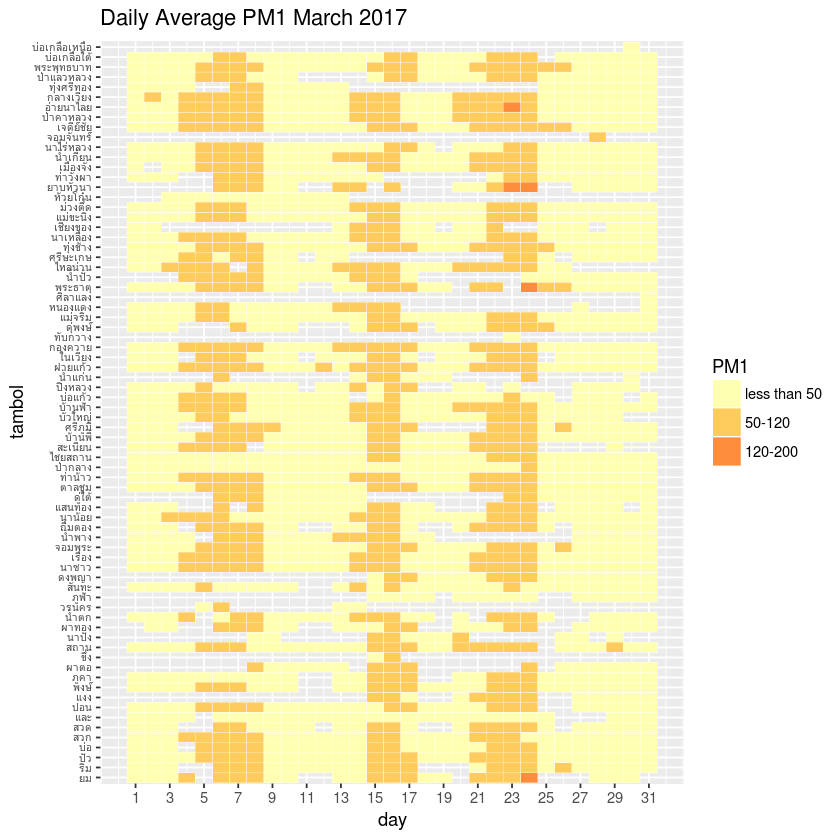

In [59]:
plot+labs(x = "day")+ggtitle("Daily Average PM1 March 2017")+guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm1march.png")

Saving 6.67 x 6.67 in image


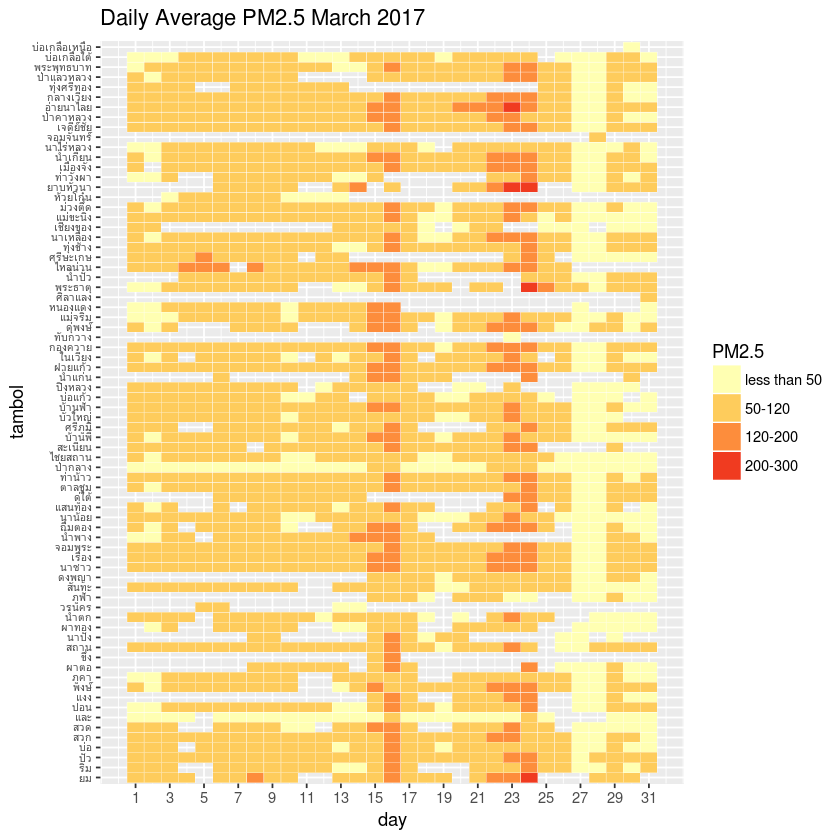

In [60]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 March 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))

ggsave("pm25march.png")

Saving 6.67 x 6.67 in image


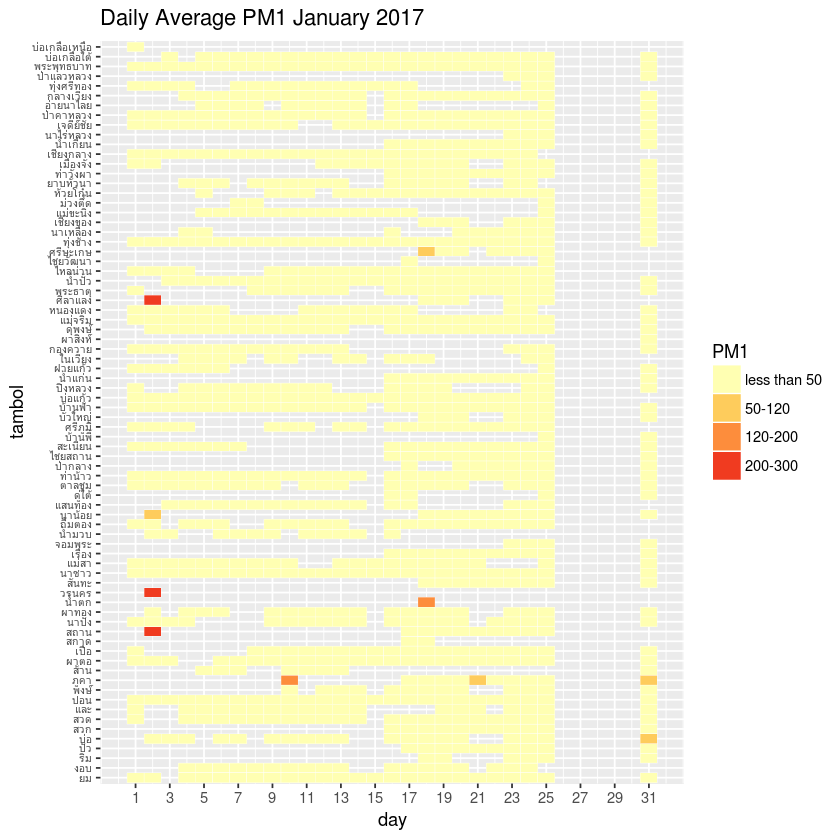

In [61]:
subairq<-sqldf('select * from airq where m=1')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 January 2017") +guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm1jan.png")

Saving 6.67 x 6.67 in image


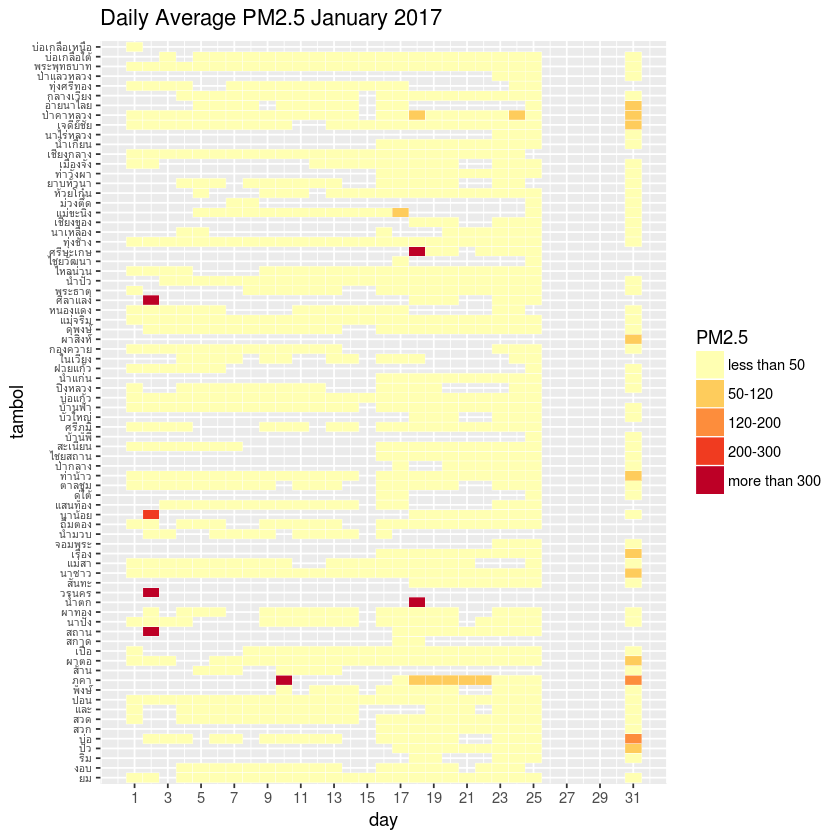

In [62]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 January 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25jan.png")

Saving 6.67 x 6.67 in image


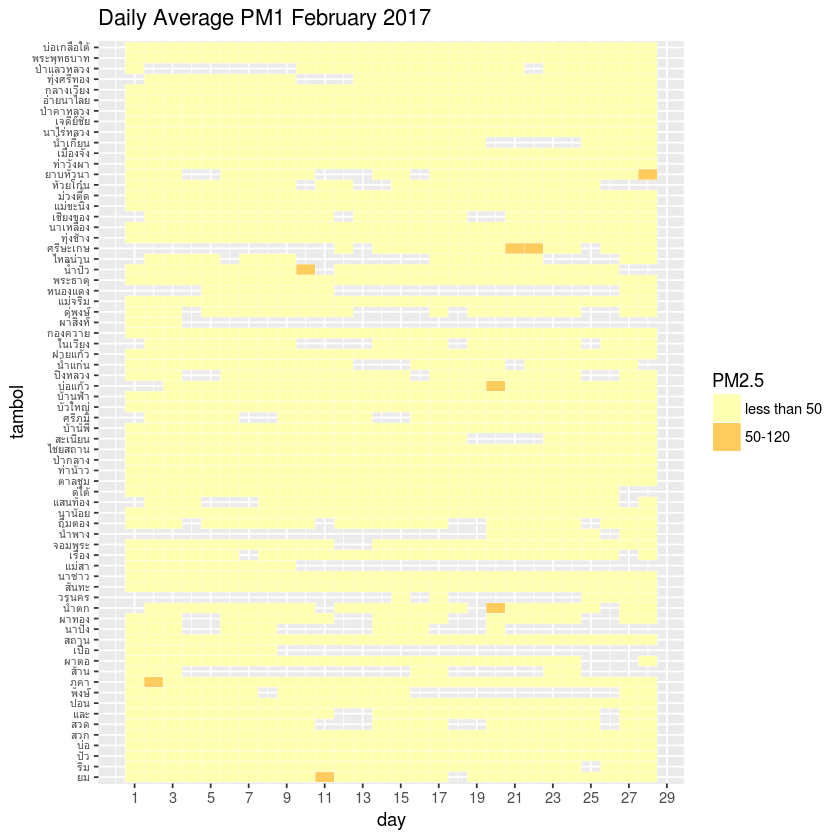

In [63]:
subairq<-sqldf('select * from airq where m=2')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 February 2017")+guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31)) 
ggsave("pm1feb.png")

Saving 6.67 x 6.67 in image


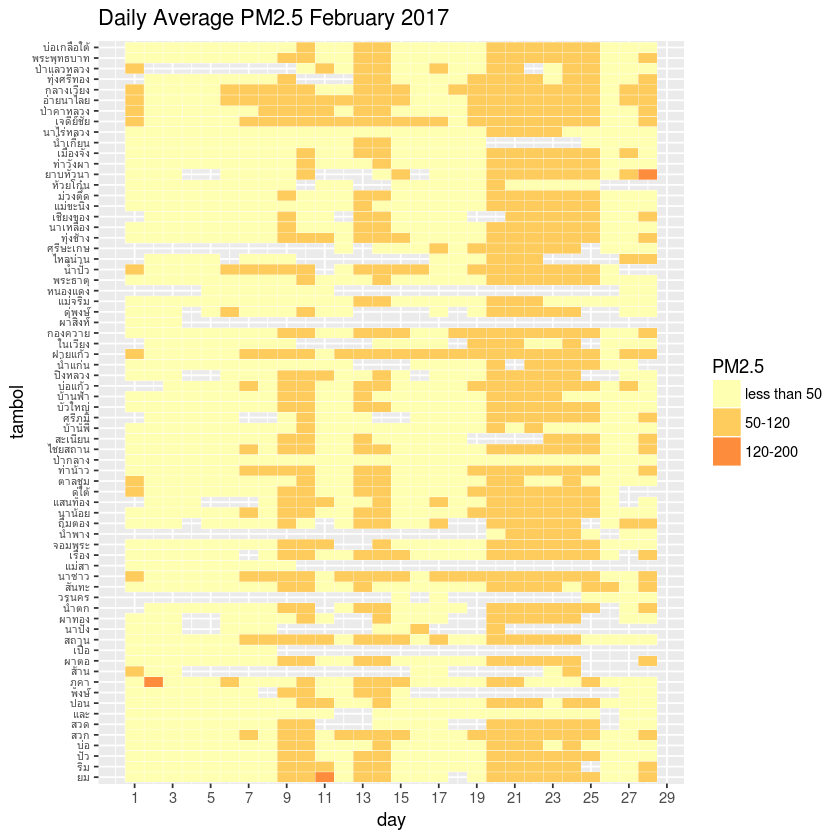

In [64]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 February 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25feb.png")

Saving 6.67 x 6.67 in image


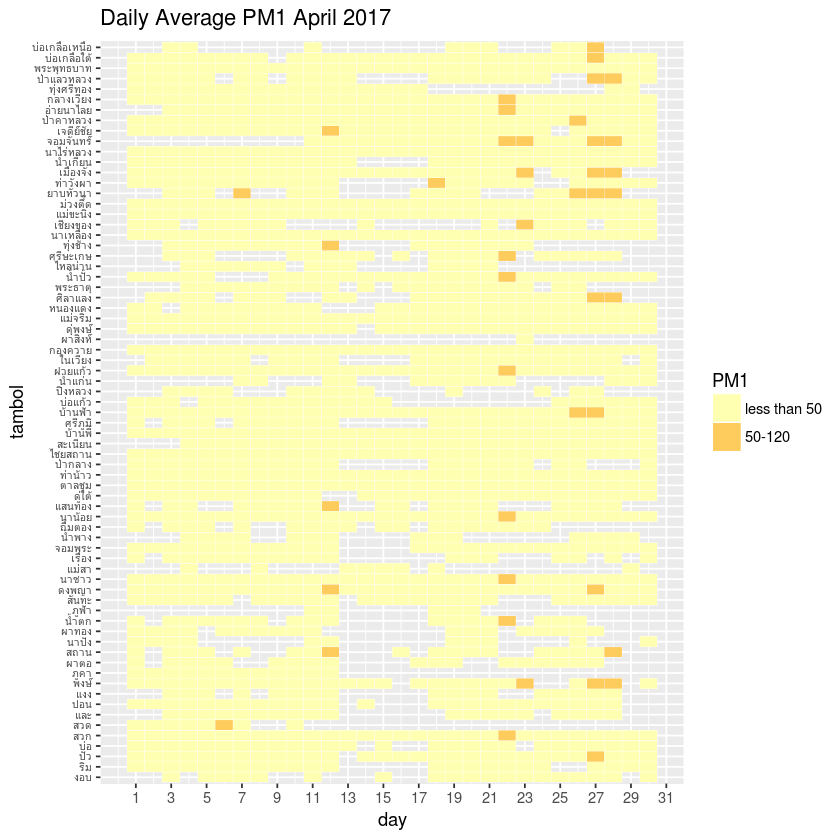

In [65]:
subairq<-sqldf('select * from airq where m=4')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 April 2017")+guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31)) 
ggsave("pm1april.png")

Saving 6.67 x 6.67 in image


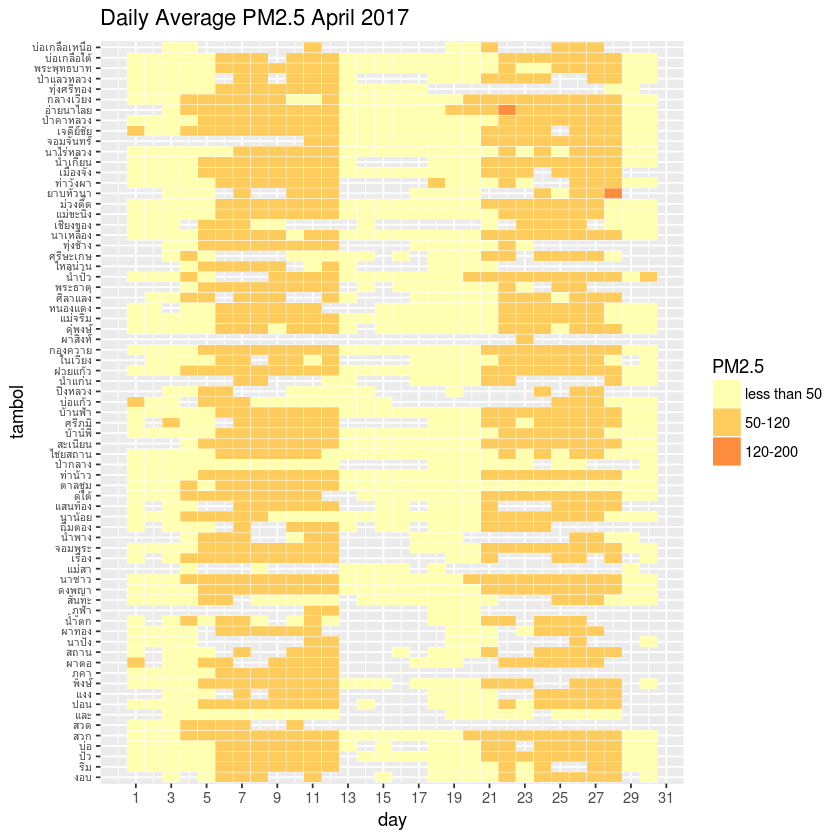

In [66]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 April 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25april.png")

Saving 6.67 x 6.67 in image


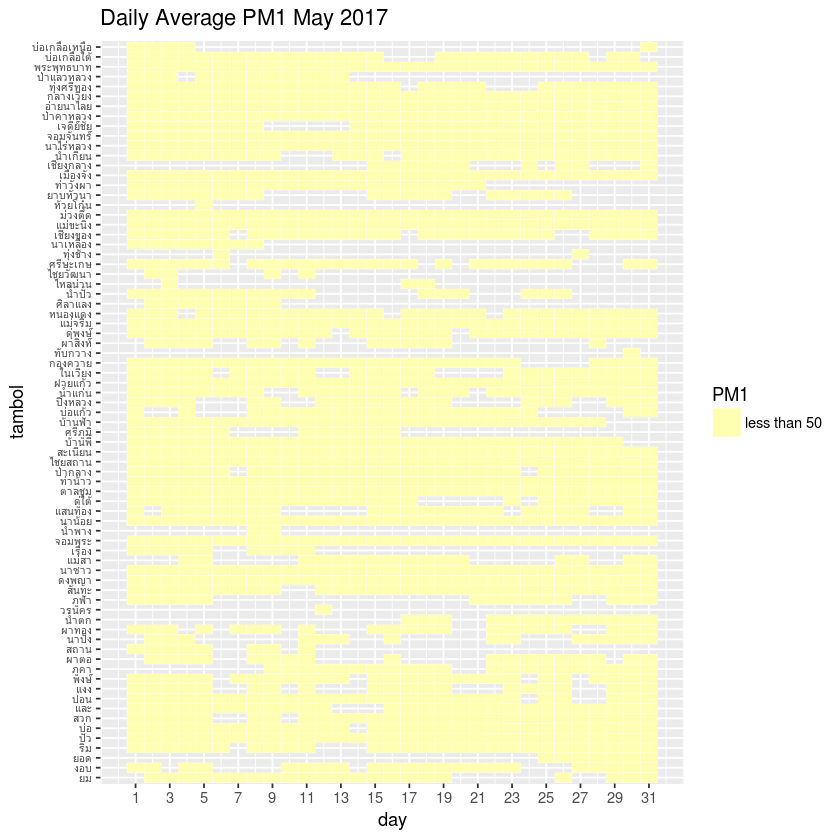

In [67]:
subairq<-sqldf('select * from airq where m=5')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 May 2017") +guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm1may.png")

Saving 6.67 x 6.67 in image


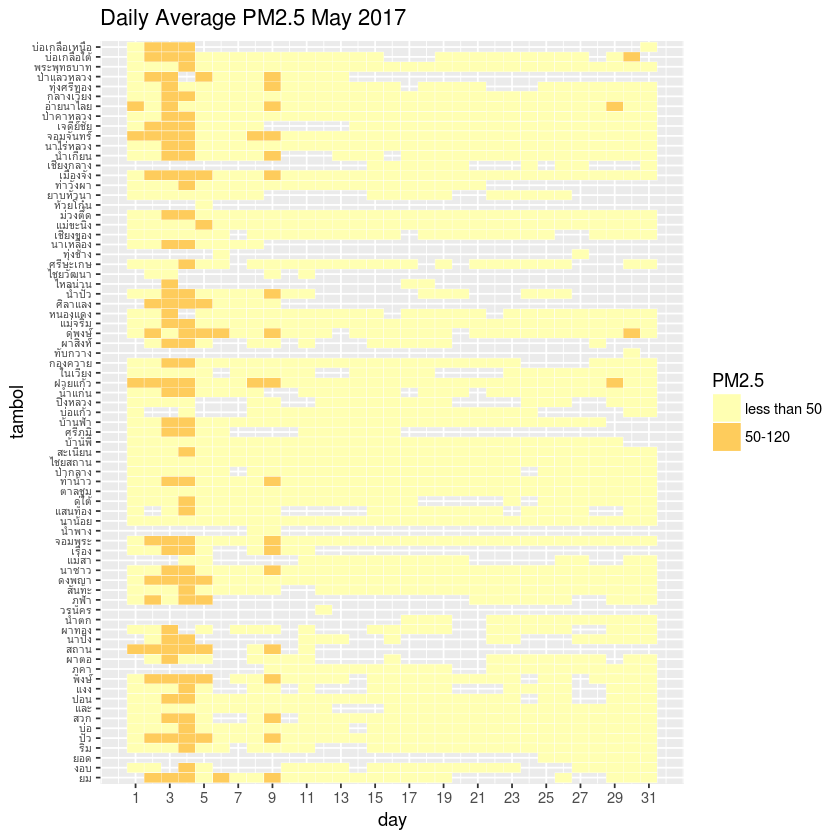

In [68]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 May 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25may.png")

Saving 6.67 x 6.67 in image


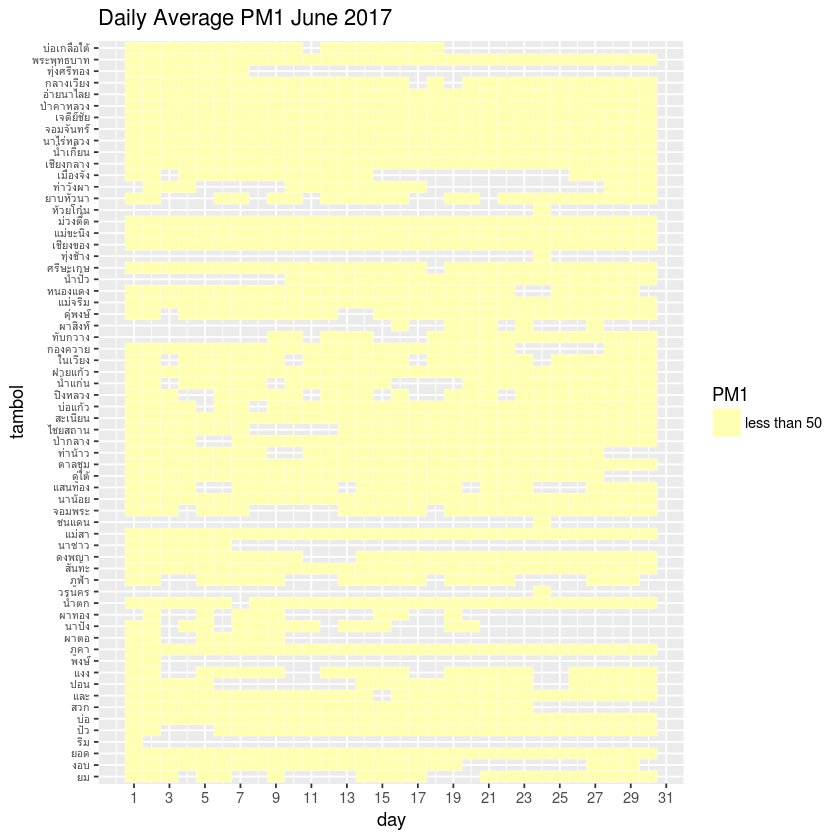

In [69]:
subairq<-sqldf('select * from airq where m=6')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 June 2017")+guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31)) 
ggsave("pm1june.png")

Saving 6.67 x 6.67 in image


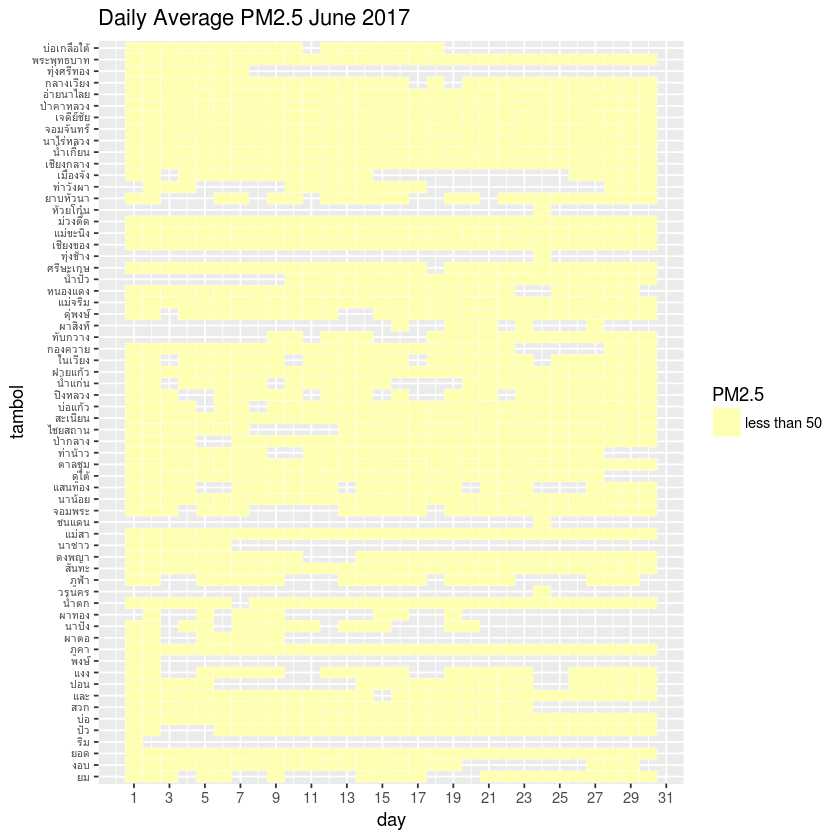

In [70]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 June 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25june.png")

Saving 6.67 x 6.67 in image


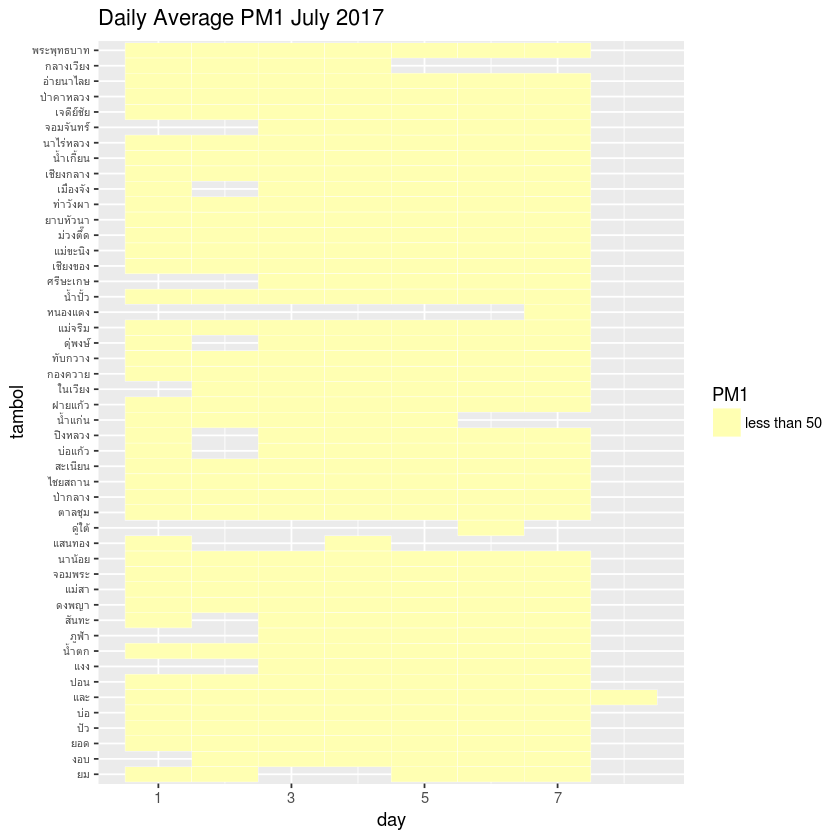

In [71]:
subairq<-sqldf('select * from airq where m=7')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 July 2017")+guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31)) 
ggsave("pm1july.png")

Saving 6.67 x 6.67 in image


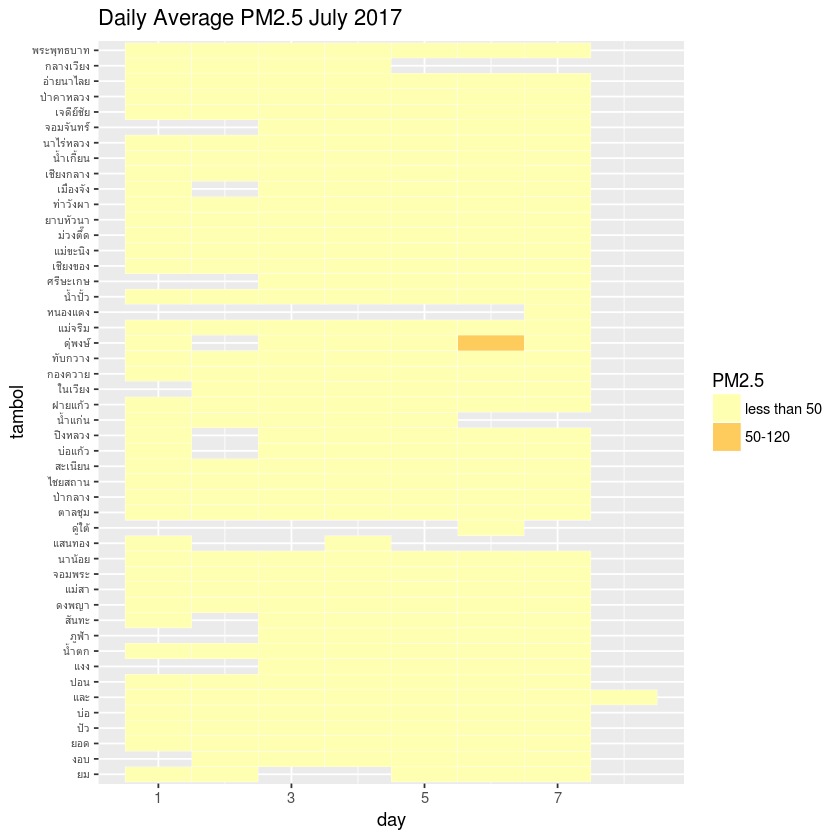

In [72]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 July 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25july.png")

Saving 6.67 x 6.67 in image


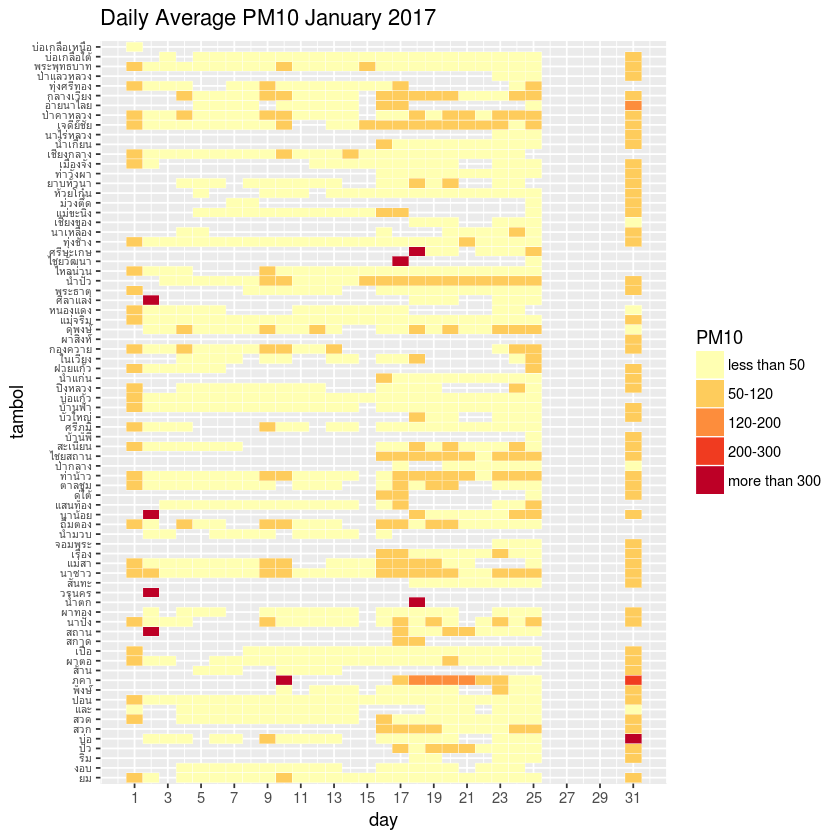

In [73]:
subairq<-sqldf('select * from airq where m=1')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM10 January 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10jan.png")

Saving 6.67 x 6.67 in image


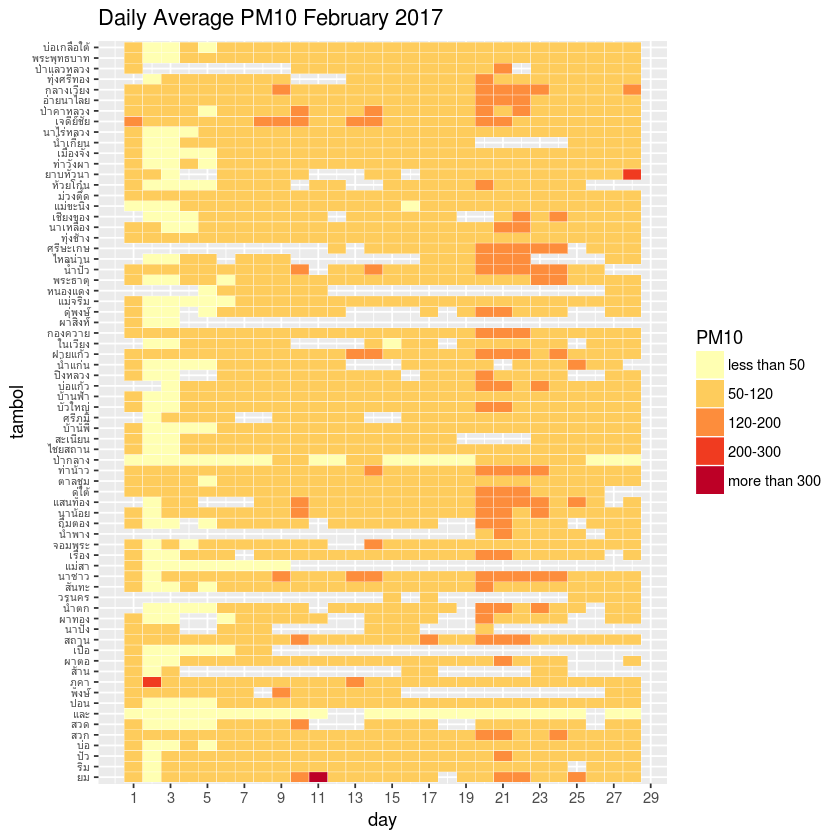

In [74]:
subairq<-sqldf('select * from airq where m=2')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM10 February 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10feb.png")

Saving 6.67 x 6.67 in image


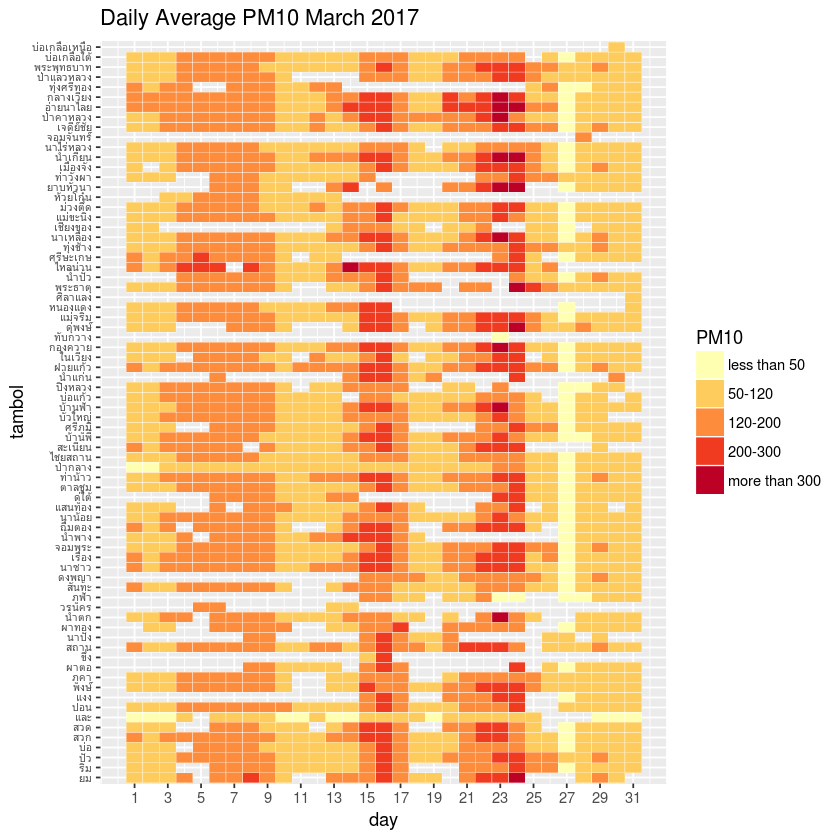

In [75]:
subairq<-sqldf('select * from airq where m=3')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM10 March 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10mar.png")

Saving 6.67 x 6.67 in image


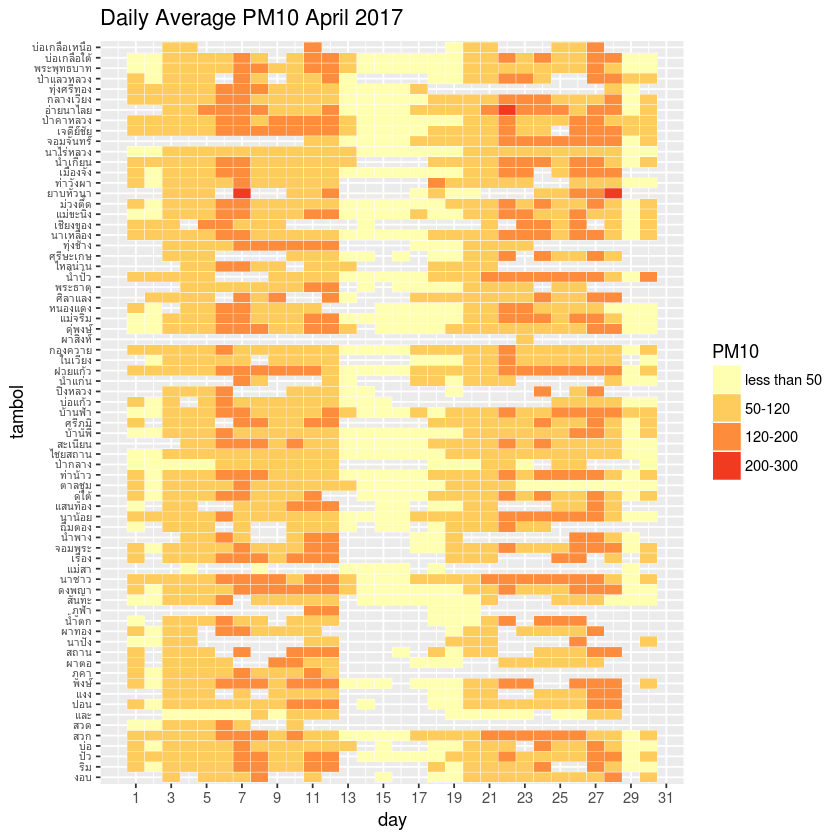

In [76]:
subairq<-sqldf('select * from airq where m=4')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM10 April 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10april.png")

Saving 6.67 x 6.67 in image


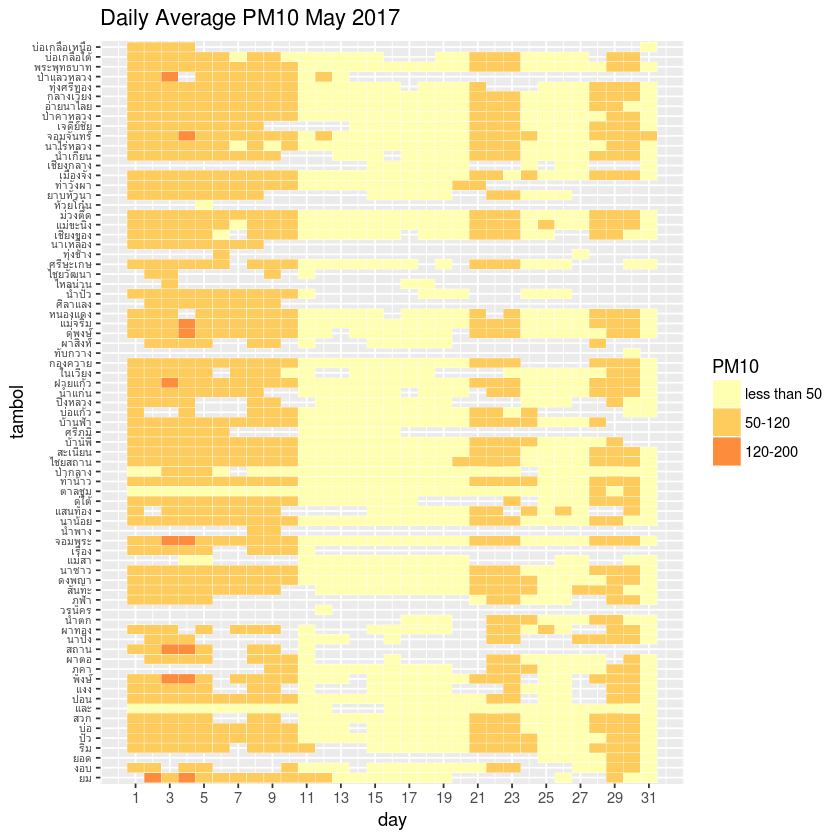

In [77]:
subairq<-sqldf('select * from airq where m=5')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM10 May 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10may.png")

Saving 6.67 x 6.67 in image


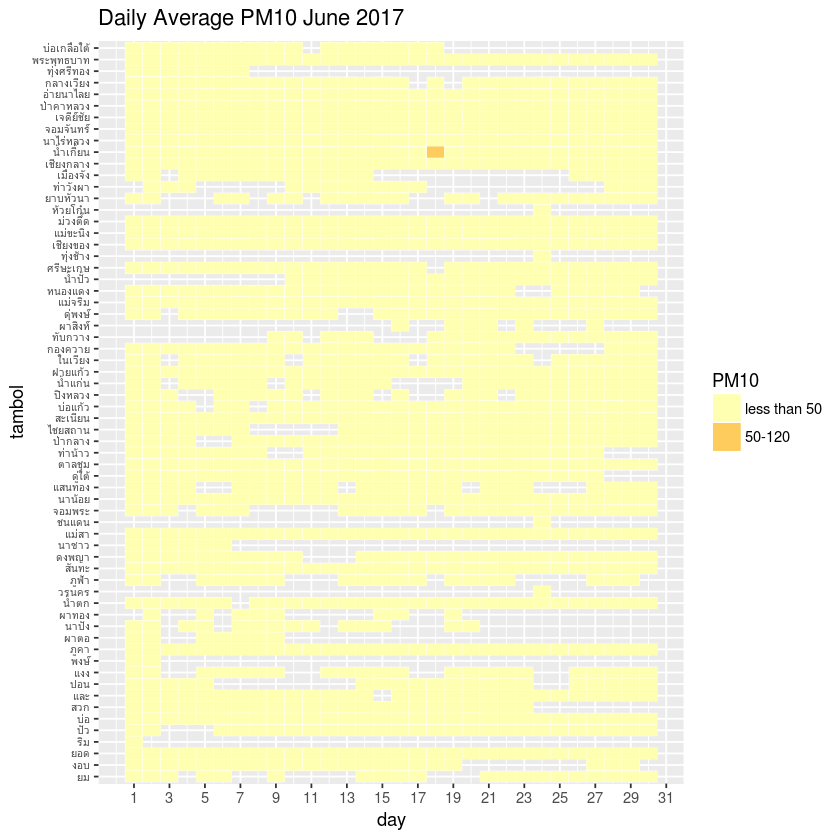

In [78]:
subairq<-sqldf('select * from airq where m=6')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM10 June 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10june.png")

Saving 6.67 x 6.67 in image


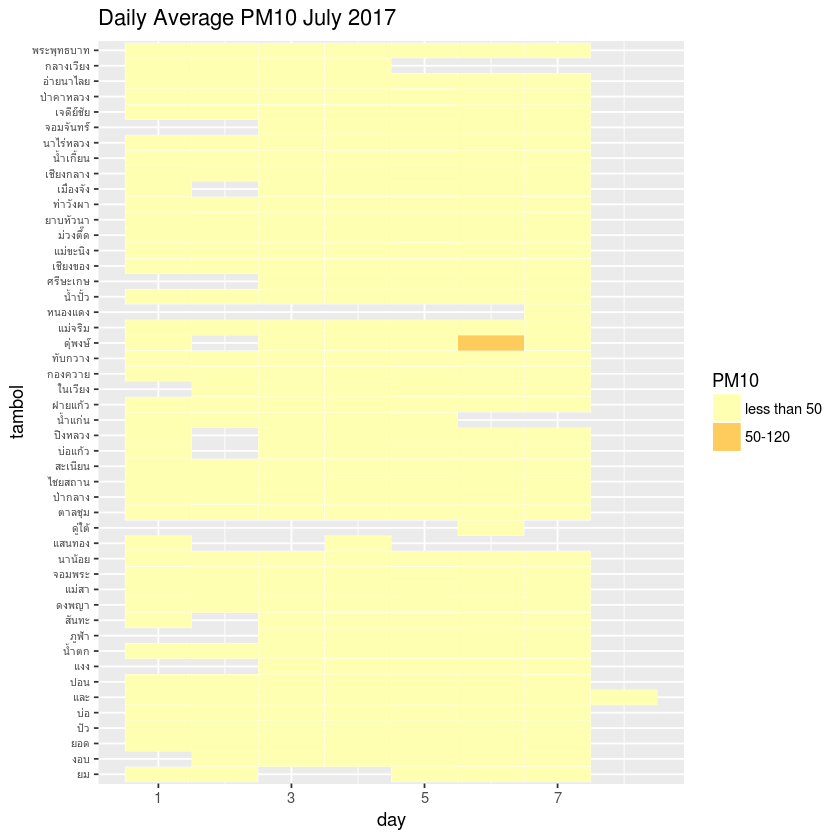

In [79]:
subairq<-sqldf('select * from airq where m=7')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM10 July 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10july.png")

In [80]:
min(airq$avgpm1)
max(airq$avgpm1)
min(airq$avgpm25)
max(airq$avgpm25)
min(airq$avgpm10)
max(airq$avgpm10)

[1] 0

[1] 293.67

[1] 0

[1] 1451.625

[1] 0

[1] 6221.56

Choose some tambol in the middle of Nan to plot violin

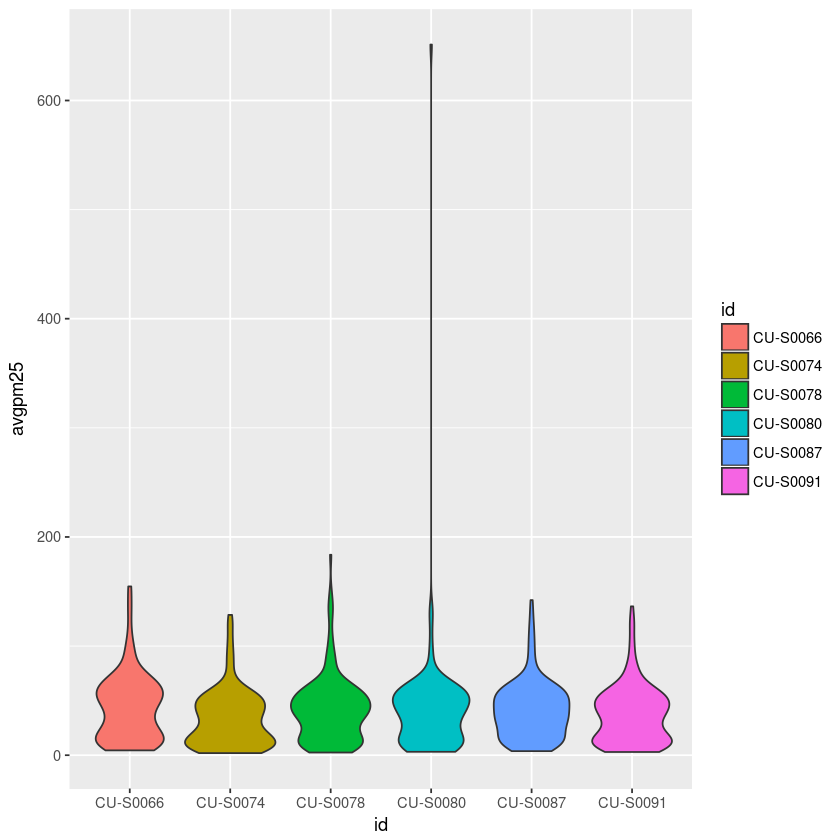

In [81]:
airqsub<-sqldf('select * from airq where id="CU-S0074" or id="CU-S0066" or id="CU-S0091" or id="CU-S0087" or id="CU-S0080" or id="CU-S0078"')
p <- ggplot(airqsub, aes(id,avgpm25))
p + geom_violin(aes(fill=id))